In [48]:
from sklearn.cluster import KMeans
import numpy as np
import rasterio
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [49]:
# Function to load satellite image data
def load_image(file_path):
    with rasterio.open(file_path) as src:
        image = src.read()
    return image

# Function to prepare dataset
def prepare_dataset(images, labels):
    height, width, channels = images[0].shape
    X = images.reshape(-1, channels)
    y = labels.flatten()
    return X, y

# Function to visualize labels on an image
def visualize_labels(image, labels):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.imshow(labels, alpha=0.5)  # Overlay labels on the image with transparency
    plt.colorbar()
    plt.title('Image with Labels')
    plt.show()

In [50]:
# Load satellite images
image_files = ['Data/1.jpg', 'Data/2.jpg', 'Data/3.jpg', 'Data/4.jpg', 'Data/5.jpg', 'Data/6.jpg', 'Data/7.jpg']
images = [load_image(file) for file in image_files]

F:\Uni\UrmiaLake\.venv\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


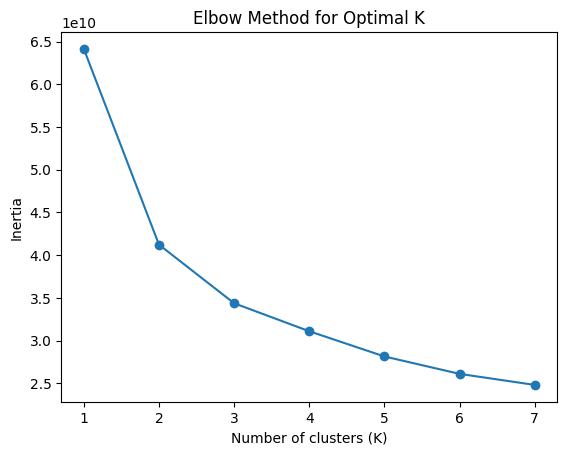

Shape of X: (22323, 1184)
Shape of y: (22323,)


In [56]:
# Reshape each image to have one row per pixel
reshaped_images = [image.reshape(-1, image.shape[-1]) for image in images]

# Concatenate all reshaped images into one array
all_pixels = np.concatenate(reshaped_images, axis=0)

# Define the range of clusters to try
k_values = range(1, min(8, all_pixels.shape[0] + 1))  # Trying cluster numbers from 1 to min(8, total number of pixels)

# Calculate the inertia for each K value
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_pixels)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to determine the optimal number of clusters
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
# Sample labels for demonstration, replace with actual labels
# Assuming 5 classes: 0 - Lake, 1 - Urban, 2 - Mountainous, 3 - Agricultural, 4 - Forest
labels = np.random.randint(0, 3, size=(len(images), images[0].shape[0], images[0].shape[1]))

# Flatten the labels to match the number of pixels
y = labels.reshape(-1)

# Prepare dataset
X, y = prepare_dataset(np.array(images), y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Train Maximum Likelihood classifier
max_likelihood_clf = RandomForestClassifier()
max_likelihood_clf.fit(X_train, y_train)

# Predict using Maximum Likelihood classifier
max_likelihood_preds = max_likelihood_clf.predict(X_test)

# Evaluate Maximum Likelihood classifier
print("Maximum Likelihood Classifier:")
print("Accuracy:", accuracy_score(y_test, max_likelihood_preds))
print("Classification Report:")
print(classification_report(y_test, max_likelihood_preds))

# Train Naïve Bayes classifier
naive_bayes_clf = GaussianNB()
naive_bayes_clf.fit(X_train, y_train)

# Predict using Naïve Bayes classifier
naive_bayes_preds = naive_bayes_clf.predict(X_test)

# Evaluate Naïve Bayes classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, naive_bayes_preds))
print("Classification Report:")
print(classification_report(y_test, naive_bayes_preds))

Maximum Likelihood Classifier:
Accuracy: 0.3341545352743561
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.34      0.34      1508
           1       0.33      0.33      0.33      1507
           2       0.34      0.34      0.34      1450

    accuracy                           0.33      4465
   macro avg       0.33      0.33      0.33      4465
weighted avg       0.33      0.33      0.33      4465
Naïve Bayes Classifier:
Accuracy: 0.3460246360582307
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.19      0.25      1508
           1       0.34      0.65      0.45      1507
           2       0.34      0.19      0.24      1450

    accuracy                           0.35      4465
   macro avg       0.35      0.34      0.31      4465
weighted avg       0.35      0.35      0.32      4465
